# Digit recognition with a CNN

Code to initiliaze Tensorflow 2.0 in Colab

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import datetime
import numpy as np
import matplotlib.pyplot as plt
%load_ext tensorboard

**Import the MNIST dataset. The default loader will return tensors for the train/test partitions of the images and the labels.**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:, :, :, np.newaxis] / 255.0
x_test = x_test[:, :, :, np.newaxis] / 255.0

**[TODO] Check the size of the loaded tensors**

In [3]:
N = np.unique(y_train).shape[0]
N_train = x_train.shape[0]
N_test = x_test.shape[0]
weight = x_train.shape[1]
height = x_train.shape[2]
print(f'Training set shape: {N_train}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test set shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')
print(f'Number of classes: {N}')

Training set shape: 60000
Training labels shape: (60000,)
Test set shape: (10000, 28, 28, 1)
Test labels shape: (10000,)
Number of classes: 10


**Prepare Keras callback for Tensorboard**

In [33]:
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, update_freq='batch')

**[TODO] Define a Keras Sequential model with the convolutional neural network**

In [34]:
def conv_layer(features, stride, kernel_size=3, k_regularizer=None):
    return tf.keras.layers.Conv2D(features,
                                  kernel_size=kernel_size,
                                  strides=(stride, stride),
                                  padding='same',
                                  kernel_regularizer=k_regularizer
                                  )

In [35]:
# Clearing previous model
tf.keras.backend.clear_session()
# Building model
model = tf.keras.models.Sequential([
    conv_layer(32, kernel_size=5, stride=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    conv_layer(64, kernel_size=5, stride=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(N, activation='softmax')
])

**[TODO] Compile the Keras model: specify the optimization algorithm, the loss function and the test metric**

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**[TODO] Train the Keras model**

In [37]:
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/3
938/938 [==============================] - 5s 5ms/step - loss: 0.1948 - accuracy: 0.9534 - val_loss: 0.0647 - val_accuracy: 0.9790
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 0.0561 - accuracy: 0.9834 - val_loss: 0.0522 - val_accuracy: 0.9830
Epoch 3/3
938/938 [==============================] - 4s 4ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0526 - val_accuracy: 0.9836


In [38]:
model.fit(x_train, y_train, batch_size=256, epochs=3, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/3
235/235 [==============================] - 3s 14ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0255 - val_accuracy: 0.9921
Epoch 2/3
235/235 [==============================] - 2s 8ms/step - loss: 0.0085 - accuracy: 0.9978 - val_loss: 0.0260 - val_accuracy: 0.9923
Epoch 3/3
235/235 [==============================] - 2s 8ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0291 - val_accuracy: 0.9911


In [41]:
print('Tensorboard informations at: http://localhost:6006')
%tensorboard --logdir logs/fit

Tensorboard informations at: http://localhost:6006


Launching TensorBoard...

**[TODO] Print model summary**

In [42]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          51264     
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 7, 7, 64)          0

**[TODO] Test the Keras model by computing the accuracy the whole test set**

In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9911


[0.029051464051008224, 0.991100013256073]

**[TODO] Visualize test image number 47 and the prediction from the neural network**

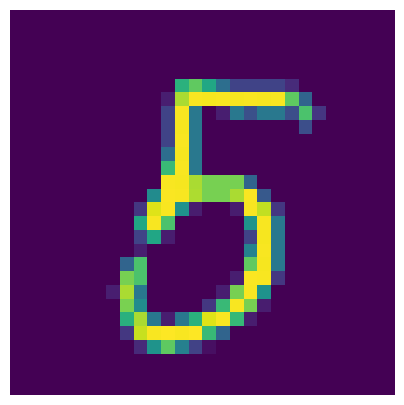

In [26]:
# Showing the image
img_number = 45
plt.figure(figsize=(5, 5))
plt.imshow(x_test[img_number])
plt.axis('off')
plt.show()

In [27]:
# Predicting the image's class
oh_label = model.predict(np.array([x_test[img_number]]))
y_hat = np.argmax(oh_label)
print(f'In the image there\'s the number: {y_hat}')

1/1 [==============================] - 0s 235ms/step
In the image there's the number: 5
